In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf

import imblearn

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from matplotlib import gridspec
from collections import Counter
from imblearn.over_sampling import SMOTE

import copy
import math
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

In [2]:
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu,linear
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

In [3]:
#PREPROCESSING:

In [4]:
data = pd.read_csv("/creditcard.csv")

In [5]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [6]:
#Summarize Class Distribution
counter = Counter(y)
print(counter)

Counter({0: 284315, 1: 492})


In [7]:
# Grab a peek at the data
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

X_train.shape (190820, 30) y_train.shape (190820,)
X_test.shape (93987, 30) y_test.shape (93987,)


In [9]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
data = data.drop(['Time'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

In [12]:
X_train.shape

(190820, 30)

In [13]:
X_test.shape

(93987, 30)

In [14]:
from sklearn.preprocessing import StandardScaler
data['normalizedAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))  # Normalize 'Amount' in [-1,+1] range
data = data.drop(['Amount'],axis=1)

In [15]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

#Model Architecture

#tf.random.set_seed(1234) # for consistent results

model = Sequential([
    Dense(units=16, input_dim = 30,activation='relu'),   # input of 29 columns as shown above
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(24,activation='relu'),
    Dense(24,activation='relu'),
    Dense(1,activation='sigmoid'),                        # binary classification fraudulent or not
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                496       
                                                                 
 dense_1 (Dense)             (None, 24)                408       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 24)                600       
                                                                 
 dense_3 (Dense)             (None, 24)                600       
                                                                 
 dense_4 (Dense)             (None, 1)                 25        
                                                                 
Total params: 2,129
Trainable params: 2,129
Non-trainabl

In [18]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
  131/12722 [..............................] - ETA: 4s - loss: 374.3464 - accuracy: 0.8819    

2024-08-31 22:28:32.025621: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


12722/12722 [==============================] - 4s 338us/step - loss: 4.9810 - accuracy: 0.9963
Epoch 2/5
12722/12722 [==============================] - 4s 339us/step - loss: 0.0317 - accuracy: 0.9981
Epoch 3/5
12722/12722 [==============================] - 4s 339us/step - loss: 0.0306 - accuracy: 0.9982
Epoch 4/5
12722/12722 [==============================] - 4s 339us/step - loss: 0.0491 - accuracy: 0.9981
Epoch 5/5
12722/12722 [==============================] - 4s 339us/step - loss: 0.0339 - accuracy: 0.9982


In [19]:
score = model.evaluate(X_test, y_test)

2938/2938 [==============================] - 1s 183us/step - loss: 0.0117 - accuracy: 0.9984


In [20]:
print(score)

[0.011748798191547394, 0.998425304889679]


In [21]:
#NEXT SECTION

In [22]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Load the data
data = pd.read_csv("/Users/sami/Documents/My Documents/ML Projects/fruad_detection/creditcard.csv")

# Step 2: Separate features and labels
X = data.iloc[:, :-1].values  # Features (all columns except the last one)
y = data.iloc[:, -1].values   # Labels (last column)

# Step 3: Normalize the entire feature set
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
standardized_data = scaler.fit_transform(X)

# Convert the numpy array back to a DataFrame
standardized_X = pd.DataFrame(standardized_data, columns=data.columns[:-1])

# Step 4: Split the normalized data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(standardized_X, y, test_size=0.33, random_state=1)

In [23]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [24]:
data = data.drop(['Time'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [25]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
37372,-1.176861,0.519049,0.084339,0.199313,0.696491,0.272243,0.665448,-0.076836,0.284782,-0.059851,...,-0.349169,0.237943,0.939267,0.096165,-1.027016,0.628389,-0.458688,0.208456,0.032250,-0.298456
215884,0.957043,-1.299888,0.684114,0.264947,0.837150,-0.411146,-0.442378,-0.434150,1.133260,-0.478732,...,-0.275435,-0.459256,-2.105982,-0.249146,-0.328775,0.471127,-1.781371,-0.690669,-0.580106,-0.349231
98616,-0.591346,0.682467,-0.377448,0.089417,-0.665351,-0.473507,-0.210292,-0.437798,-0.023301,-0.941199,...,0.256884,-0.153101,-0.812754,-0.004985,-0.869704,0.548915,-1.011003,-0.018004,0.034247,-0.133335
172195,0.551320,-0.527570,-0.274734,0.417924,-0.144894,-0.394009,0.590355,1.792847,-0.092055,0.282742,...,1.091772,-0.209054,-0.811321,1.082160,-0.740822,0.075514,0.168372,0.096093,-0.052670,1.205944
19496,-1.357938,-0.224782,-0.811351,1.213959,-1.461675,-0.650779,-0.298521,-0.811767,0.085394,-1.354540,...,-0.102830,-0.117825,0.082157,0.296096,-0.213599,-0.636776,-0.818770,0.252398,0.269233,-0.110146


In [26]:
X_train.shape

(190820, 30)

In [27]:
X_test.shape

(93987, 30)

In [28]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [29]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [30]:
tf.random.set_seed(1234) # for consistent results
model = Sequential(
    [               
        ### START CODE HERE ### 
        tf.keras.Input(shape=(30,)),
        Dense(64, activation='relu', name = "L1"),
        Dense(32, activation='relu', name = "L2"),
        Dense(16, activation='relu', name = "L3"),
        Dense(1, activation='sigmoid', name = "L4"),
        #Dense(1, activation='sigmoid', name = "L4") 
    ],
)

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 16)                496       
                                                                 
 dense_6 (Dense)             (None, 24)                408       
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 dense_7 (Dense)             (None, 24)                600       
                                                                 
 dense_8 (Dense)             (None, 24)                600       
                                                                 
 dense_9 (Dense)             (None, 1)                 25        
                                                                 
Total params: 2,129
Trainable params: 2,129
Non-traina

In [32]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
12722/12722 [==============================] - 5s 346us/step - loss: 0.0115 - accuracy: 0.9973
Epoch 2/5
12722/12722 [==============================] - 5s 355us/step - loss: 0.0042 - accuracy: 0.9993
Epoch 3/5
12722/12722 [==============================] - 4s 341us/step - loss: 0.0036 - accuracy: 0.9993
Epoch 4/5
12722/12722 [==============================] - 4s 354us/step - loss: 0.0035 - accuracy: 0.9993
Epoch 5/5
12722/12722 [==============================] - 4s 348us/step - loss: 0.0034 - accuracy: 0.9994


In [33]:
score = model.evaluate(X_test, y_test)

2938/2938 [==============================] - 1s 185us/step - loss: 0.0037 - accuracy: 0.9993


In [34]:
print(score)

[0.003714200109243393, 0.9992977976799011]


2938/2938 [==============================] - 0s 157us/step


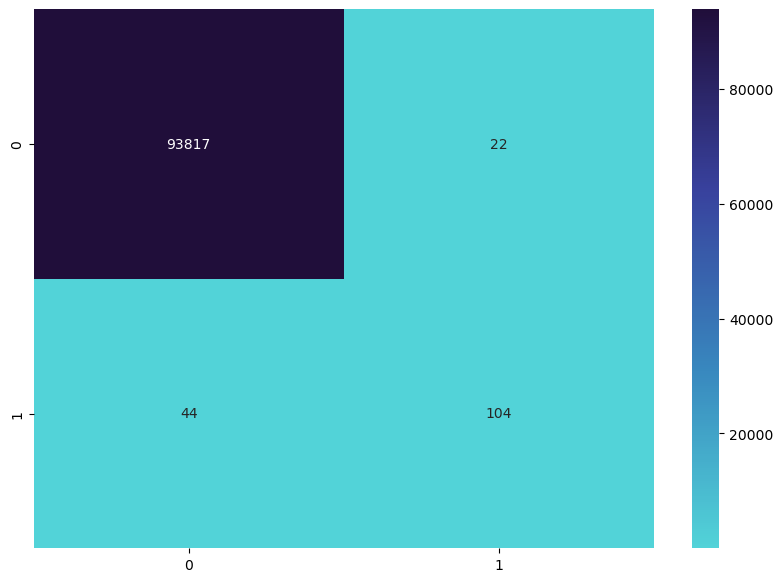

Test Data Accuracy: 0.9993


In [35]:
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.colors as mcolors

# Define the custom colormap
colors = ['#52D3D8', '#3887BE', '#38419D', '#200E3A']
cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", colors)

# Assuming y_pred and y_test are defined as in your code
y_pred = model.predict(X_test)

# Binarize the predictions
y_pred = (y_pred > 0.5).astype(int)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Convert confusion matrix to a DataFrame for better visualization
df_cm = pd.DataFrame(cm, index=[0, 1], columns=[0, 1])

# Plot the confusion matrix with the custom color scheme
plt.figure(figsize=(10, 7))
sn.heatmap(df_cm, annot=True, fmt='g', cmap=cmap)
plt.show()

# Print the accuracy
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))